In [1]:
import pandas as pd
import numpy as np


In [3]:
pd.read_csv('Bases_trabajo/models_comparaison.csv')

,Unnamed: 0,Model,Parameter,Recall,Score,MAE,Accuracy
0,0,LinearRegression,n_job,None,LinearRegression,LinearRegression,LinearRegression
1,1,PolynomialFeatures,degree,None,PolynomialFeatures,PolynomialFeatures,PolynomialFeatures
2,2,SVR,Kernel_C_gamma_epsilon,None,SVR,SVR,SVR
3,3,LogisticRegression,max_iter,LogisticRegression,LogisticRegression,LogisticRegression,LogisticRegression
4,4,KNeighborsClassifier,n_neighbors,KNeighborsClassifier,KNeighborsClassifier,KNeighborsClassifier,KNeighborsClassifier
5,5,SVC,Kernel_C_gamma,SVC,SVC,SVC,SVC
6,6,DecisionTreeRegressor,max_depth,DecisionTreeRegressor,DecisionTreeRegressor,DecisionTreeRegressor,DecisionTreeRegressor
7,7,RandomForestRegressor,n_estimators_max_depth,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor
8,8,DecisionTreeClassifier,None,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier
9,9,RandomForestClassifier,n_splits_n_repeats,DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier


In [2]:
ENS_2017 = pd.read_csv("../data/Bases_originales/ENS_2017_Adultos_1.csv", sep =';')

C:\Users\ggarr\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (149,151,152) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
import sys, os
path = os.getcwd()
k = os.path.dirname(path)
k = k + os.sep + "src"
sys.path.append(k)


In [ ]:
import utils.Data_wrangling as dw
col = ['E1_1', 'E4']

missing_cualitativas = dw.missing(ENS_2017, col=col, 8,9)
missing_cualitativas

# Lee bien la función del archivo en el que está pero es errónea

In [2]:
ENS_2017_C= pd.read_csv("../data/Bases_trabajo/ENS_2017_C.csv", sep =',')

In [7]:
variables = ['CCAA', 'Sexo']
for i in variables:
    Cluster_i = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C[i]).apply(lambda r: r/r.sum() *100,axis=0)
    print(Cluster_i)

CCAA             1          2          3      4      5      6          7   \
Clusters                                                                    
0         36.729131   0.000000   0.000000  100.0    0.0    0.0  20.823621   
1         23.236797  85.933014  34.326579    0.0  100.0  100.0  62.781663   
2         40.034072  14.066986  65.673421    0.0    0.0    0.0  16.394716   

CCAA             8          9          10     11         12     13     14  \
Clusters                                                                    
0         56.344277  84.976725  53.194975  100.0  44.269663    0.0    0.0   
1         31.233363   9.691071  46.805025    0.0  32.434457    0.0    0.0   
2         12.422360   5.332205   0.000000    0.0  23.295880  100.0  100.0   

CCAA         15         16     17     18     19  
Clusters                                         
0           0.0  14.792503    0.0    0.0    0.0  
1           0.0  49.732262    0.0  100.0  100.0  
2         100.0  35.475234  

In [13]:
variables = ['Edad', 'Peso(Kg)']

for i in variables:
    Cluster_i = ENS_2017_C.groupby(['Clusters'])[i].describe()

Cluster_i

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,7650.0,72.348366,14.543179,25.0,62.0,71.0,80.0,150.0
1,7743.0,73.048302,14.900063,26.0,62.0,71.0,82.0,180.0
2,7696.0,72.264683,14.475001,36.0,62.0,71.0,80.0,155.0


In [8]:
ENS_2017 = pd.read_csv("../data/Bases_originales/ENS_2017_Adultos_1.csv", sep =';')

In [9]:
ENS_2017_1 = ENS_2017

In [10]:

variables = ['ACTIVa','NIVEST','W127','CLASE_PR','IMCa', 'E4', 'E1_1']
def sustitucion_missing (df)
for i in variables:
    
    if i == 'ACTIVa':
        ENS_2017_1['ACTIVa']= ENS_2017_1['ACTIVa'].replace({7: np.nan, 8: np.nan})
        
        na_ratio = ((ENS_2017_1[i].isnull().sum() / len(ENS_2017_1[i]))*100)
        print (f'El porcentaje de missing value de la variable {i} es: {na_ratio}')
    
        ENS_2017_1[i].fillna(ENS_2017_1[i].mode()[0], inplace=True)
        print("missing value, una vez sustituidos por la moda: " + str(ENS_2017_1[i].isnull().sum()))
    

    elif i == 'NIVEST' or i == 'W127':
        ENS_2017_1['NIVEST']= ENS_2017_1['NIVEST'].replace({98: np.nan, 99: np.nan})
        ENS_2017_1['W127']= ENS_2017_1['W127'].replace({98: np.nan, 99: np.nan})
        
        na_ratio = ((ENS_2017_1[i].isnull().sum() / len(ENS_2017_1[i]))*100)
        print (f'El porcentaje de missing value de la variable {i} es: {na_ratio}')
    
        ENS_2017_1[i].fillna(ENS_2017_1[i].mode()[0], inplace=True)
        print("missing value, una vez sustituidos por la moda: " + str(ENS_2017_1[i].isnull().sum()))

    elif i == 'CLASE_PR' or i == 'IMCa':
        ENS_2017_1['CLASE_PR']= ENS_2017_1['CLASE_PR'].replace({9: np.nan})
        ENS_2017_1['IMCa']= ENS_2017_1['IMCa'].replace({9: np.nan})
        
        na_ratio = ((ENS_2017_1[i].isnull().sum() / len(ENS_2017_1[i]))*100)
        print (f'El porcentaje de missing value de la variable {i} es: {na_ratio}')
    
        ENS_2017_1[i].fillna(ENS_2017_1[i].mode()[0], inplace=True)
        print("missing value, una vez sustituidos por la moda: " + str(ENS_2017_1[i].isnull().sum())) 

    else:
        ENS_2017_1[i]= ENS_2017_1[i].replace({8: np.nan, 9: np.nan})

        na_ratio = ((ENS_2017_1[i].isnull().sum() / len(ENS_2017_1[i]))*100)
        print (f'El porcentaje de missing value de la variable {i} es: {na_ratio}')
        
        ENS_2017_1[i].fillna(ENS_2017_1[i].mode()[0], inplace=True)
        print("missing value, una vez sustituidos por la moda: " + str(ENS_2017_1[i].isnull().sum()))
        

    

El porcentaje de missing value de la variable ACTIVa es: 0.12126986876867772
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable NIVEST es: 0.0
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable W127 es: 0.11260773528520074
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable CLASE_PR es: 2.6246264454935253
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable IMCa es: 4.634241413660185
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable E4 es: 0.6020182771016501
missing value, una vez sustituidos por la moda: 0
El porcentaje de missing value de la variable E1_1 es: 0.0
missing value, una vez sustituidos por la moda: 0


In [3]:
ENS_2017 = pd.read_csv("../data/Bases_originales/ENS_2017_Adultos_1.csv", sep =';')

ENS_2017_1 = ENS_2017

C:\Users\ggarr\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (149,151,152) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


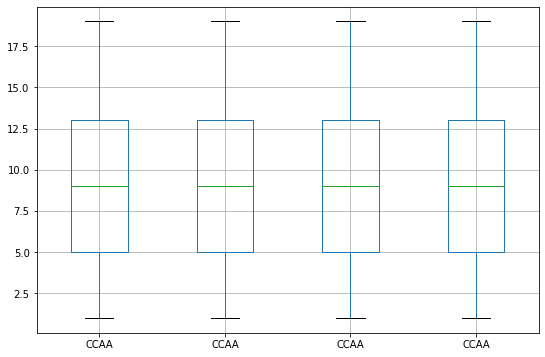

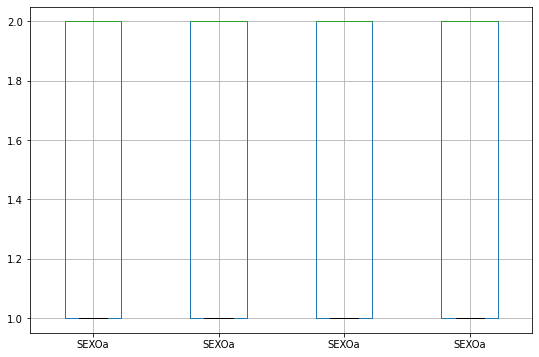

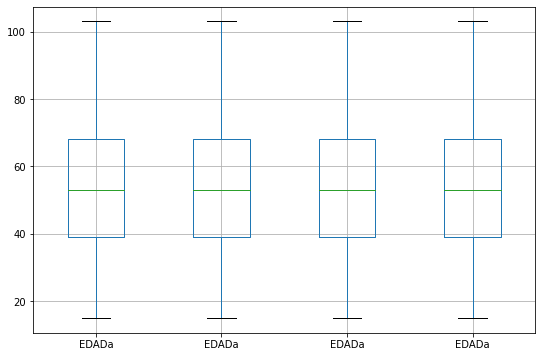

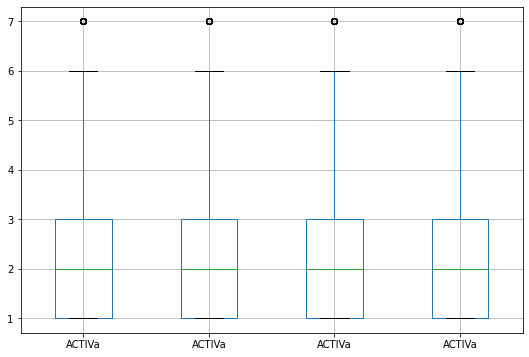

In [6]:
import matplotlib.pyplot as plt

columnas = ['CCAA', 'SEXOa', 'EDADa', 'ACTIVa']

for i in columnas: 
    plt.figure(figsize=(9,6))

    boxplot = ENS_2017_1.boxplot(column=[i,i,i,i])
    boxplot.plot()

    plt.savefig("../reports/outliers/ENS_2017_1.{i}.jpg", bbox_inches='tight') # para archivar el gráfico como jpg

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [15]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

In [16]:
# Pasamos a array la variable que queremos predecir 
y = np.array(ENS_2017_valida_2['Salud_percibida'])

# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))

In [17]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
for i in range (3,5):
    X_train = StandardScaler().fit_transform(X_train)

    print ('n_cluster_train:', i)
    kmeans_train = KMeans(n_clusters=i, random_state=42).fit(X_train)
    print("kmeans.labels_:", kmeans_train.labels_)
    predict_train = kmeans_train.predict(X_train)
    print("\npredict:", predict_train)
    clusters_train = kmeans_train.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_train}')

    k_train_score = metrics.accuracy_score(y_train, predict_train)
    print(f'K_train_Score: {k_train_score.round(2)}')

    print ('...........................')
    X_test = StandardScaler().fit_transform(X_test)
    
    print ('n_cluster_test:', i)
    kmeans_test = KMeans(n_clusters=i, random_state=42).fit(X_test)
    print("kmeans.labels_:", kmeans_test.labels_)
    predict_test = kmeans_test.predict(X_test)
    print("\npredict:", predict_test)
    clusters_test = kmeans_test.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_test}')

    k_test_score = metrics.accuracy_score(y_test, predict_test)
    print(f'K_train_Score: {k_test_score.round(2)}')

    print ('...................................')
    print ('...................................')

n_cluster_train: 3
kmeans.labels_: [1 1 0 ... 1 1 2]

predict: [1 1 0 ... 1 1 2]

KMeans cluster centers 3:
 [[ 5.34031238e-02  9.72353790e-02  1.43876087e-01 -2.87581942e-01
  -4.61789374e-01 -8.24281923e-02 -2.03996242e-01 -2.83565057e-02
   8.66251707e-01  3.03554912e-01 -1.12679319e-01 -1.41230253e-01
  -4.72925426e-02 -2.81124917e-02 -2.32422278e-01  4.55006371e-01
  -2.95541745e-01  4.47230681e-02 -2.55558085e-02 -1.85975743e-01
   1.48533902e-01  1.20722364e-01 -3.51008221e-01  4.39960928e-02
   8.54886696e-02  8.03016020e-02  9.47218061e-02  5.56706405e-02
  -3.55848558e-01  5.00980504e-01  1.54360361e-02 -1.86607602e-01
   6.74248984e-02 -7.14172392e-01 -3.09933799e-01]
 [-3.47881312e-02 -7.51199584e-02 -3.71255492e-01 -7.55955527e-01
  -2.80462502e-01  2.92382643e-01  1.75490280e-01 -3.99196166e-01
  -5.39900236e-02  4.46829362e-01  2.95701726e-01  3.30158173e-01
   2.97710262e-01  2.85635625e-01  2.05812027e-01 -1.01338606e-01
   6.57552239e-01 -3.46418832e-01 -1.15067330e-0

In [19]:
from sklearn.decomposition import PCA

for i in range (3,6):
    print ('PCA:', i)
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca = pca.transform(X)
    print('Varianza explicativa para PCA:', i)
    print(f'Varianza explicativa \n{pca.explained_variance_ratio_}')
    total_var_pca = pca.explained_variance_ratio_[0]
    print(f'\nTotal varianza explicativa: \n{total_var_pca.round(2)}')

    print('Kmeans para PCA:', i)
    kmeans_pca = KMeans(n_clusters=3, random_state=11).fit(X_pca)
    print("kmeans.labels_:", kmeans_pca.labels_)
    predict_pca = kmeans_pca.predict(X_pca)
    print("\npredict:", predict_pca)
    clusters_pca = kmeans_pca.cluster_centers_
    print(f'\nKMeans cluster centers con PCA: i {clusters_pca}')

    print('Score para PCA:', i)
    k_pca_score = metrics.accuracy_score(y, predict_pca)
    print(f'PCA_Score: {k_pca_score}')
    print(f'PCA_Score: {k_pca_score.round(2)}')

    print ('....................................')

PCA: 3
Varianza explicativa para PCA: 3
Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06]

Total varianza explicativa: 
1.0
Kmeans para PCA: 3
kmeans.labels_: [1 1 1 ... 0 0 0]

predict: [1 1 1 ... 0 0 0]

KMeans cluster centers con PCA: i [[-7.73399999e+03 -2.90036599e-02  2.10127481e-01]
 [ 7.65850003e+03 -7.35999506e-03  1.48824068e-01]
 [-7.55000387e+01  3.61536868e-02 -3.58373465e-01]]
Score para PCA: 3
PCA_Score: 0.3025250119104335
PCA_Score: 0.3
....................................
PCA: 4
Varianza explicativa para PCA: 4
Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06 5.77834314e-07]

Total varianza explicativa: 
1.0
Kmeans para PCA: 4
kmeans.labels_: [0 0 0 ... 1 1 1]

predict: [0 0 0 ... 1 1 1]

KMeans cluster centers con PCA: i [[ 7.72750003e+03  1.07715194e-01  8.69439271e-02 -7.04617900e-01]
 [-7.66499999e+03  6.53678054e-02  2.09395711e-01 -1.26059232e+00]
 [ 6.24999600e+01 -1.72750337e-01 -2.97353334e-01  1.96985302e+00]]
Score para 

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("kmeans.labels_:", kmeans.labels_)
predict = kmeans.predict(X)
print("\npredict:", predict)
clusters = kmeans.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters}')

k_score = metrics.accuracy_score(y, predict)
print(f'K_Score: {k_score.round(2)}')

kmeans.labels_: [2 2 2 ... 1 1 1]

predict: [2 2 2 ... 1 1 1]

KMeans cluster centers 3:
 [[1.15215000e+04 1.07767672e+01 1.54534823e+00 5.33778586e+01
  2.39851871e+00 1.06795738e+00 1.92918399e+00 2.07445426e+00
  5.87409044e+00 1.75272869e+00 1.02598753e+00 1.02702703e+00
  1.81704782e+00 1.83575884e+00 7.22544179e+01 2.03417360e+00
  1.72479210e+00 2.86772349e+00 3.57276507e+00 3.62240125e+00
  3.01858108e+00 1.34979210e+00 1.99051455e+00 3.76273389e+00
  3.63240644e+00 1.40059771e+00 3.16930873e+00 4.98999480e+00
  4.40059771e+00 4.02936590e+00 3.06496881e+00 5.53404366e+00
  3.93308212e+00 3.93620062e+00 2.67762474e+00]
 [1.92290000e+04 7.74297189e+00 1.54035497e+00 5.34503174e+01
  2.46949087e+00 1.04922917e+00 1.93444747e+00 2.08433735e+00
  5.75722244e+00 1.77458220e+00 1.02668739e+00 1.02681695e+00
  1.78637129e+00 1.85153517e+00 7.30513020e+01 1.94869802e+00
  1.81552015e+00 3.05583625e+00 3.70734551e+00 3.61264412e+00
  3.00816168e+00 1.37699184e+00 2.14211685e+00 3.8800362

In [21]:
X_train = StandardScaler().fit_transform(X_train)

print ('n_cluster_train:', 3)
kmeans_train = KMeans(n_clusters=3, random_state=42).fit(X_train)
print("kmeans.labels_:", kmeans_train.labels_)
predict_train = kmeans_train.predict(X_train)
print("\npredict:", predict_train)
clusters_train = kmeans_train.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

k_train_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_Score: {k_train_score.round(2)}')

X_test = StandardScaler().fit_transform(X_test)

print ('n_cluster_test:', 3)
kmeans_test = KMeans(n_clusters=3, random_state=42).fit(X_test)
print("kmeans.labels_:", kmeans_test.labels_)
predict_test = kmeans_test.predict(X_test)
print("\npredict:", predict_test)
clusters_test = kmeans_test.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

k_test_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_train_Score: {k_test_score.round(2)}')

n_cluster_train: 3
kmeans.labels_: [1 1 0 ... 1 1 2]

predict: [1 1 0 ... 1 1 2]

KMeans cluster centers 3:
 [[ 5.34031238e-02  9.72353790e-02  1.43876087e-01 -2.87581942e-01
  -4.61789374e-01 -8.24281923e-02 -2.03996242e-01 -2.83565057e-02
   8.66251707e-01  3.03554912e-01 -1.12679319e-01 -1.41230253e-01
  -4.72925426e-02 -2.81124917e-02 -2.32422278e-01  4.55006371e-01
  -2.95541745e-01  4.47230681e-02 -2.55558085e-02 -1.85975743e-01
   1.48533902e-01  1.20722364e-01 -3.51008221e-01  4.39960928e-02
   8.54886696e-02  8.03016020e-02  9.47218061e-02  5.56706405e-02
  -3.55848558e-01  5.00980504e-01  1.54360361e-02 -1.86607602e-01
   6.74248984e-02 -7.14172392e-01 -3.09933799e-01]
 [-3.47881312e-02 -7.51199584e-02 -3.71255492e-01 -7.55955527e-01
  -2.80462502e-01  2.92382643e-01  1.75490280e-01 -3.99196166e-01
  -5.39900236e-02  4.46829362e-01  2.95701726e-01  3.30158173e-01
   2.97710262e-01  2.85635625e-01  2.05812027e-01 -1.01338606e-01
   6.57552239e-01 -3.46418832e-01 -1.15067330e-0